# 사이킷런(scikit-learn) 소개와 특징

파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리이다.  
최근에는 텐서플로, 케라스 등 딥러닝 전문 라이브러리의 강세로 인해 대중적인 관심이 줄어들고는 있지만 여전히 많은 데이터 분석가가 의존하는 대표적인 파이썬 ML 라이브러리이다.  

** 특징  
파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API 를 지향할 정도로 쉽고 가장 파이썬스러운 API 를 제공한다.  

머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 를 제공한다.  

오랜 기간 실전 환경에서 검정됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리이다.

Anaconda 설치 시 기본으로 사이킷런까지 설치가 완료된다.  
 
conda, pip 을 이용하여 사이킷런 설치

    conda install scikit-learn
   
    pip install scikit-learn

In [5]:
import sklearn

print(sklearn.__version__)  # 버전 확인

0.24.1


# 붓꽃 품종 예측하기

붓꽃 품종을 분류(Classification) 하는 것이다.  
붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature) 를 기반으로 꽃의 품종을 예측하기 위한 것이다.  

분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나이다.  
지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다.  
즉 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다.  
이 때 학습을 위해 주어진 데이터 세트를 학습 데이터 세트, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트로 지칭한다.  

## 필요 모듈 로드

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

sklearn.datasets : 사이킷런 에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임  
sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스의 모임  
sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임  
하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭. 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다.

## 붓꽃 데이터 로딩 및 확인

In [9]:
import pandas as pd 

# 붓꽃 데이터 세트를 로딩

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.

iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.

iris_label = iris.target
print(iris_label)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [13]:
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame 으로 변환

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


피처에는 sepal length, sepal width,	petal length, petal width 가 있다.  
레이블(Lable, 결정값)은 0,1,2 세 가지 값으로 돼 있으며 0이 Setosa 품종, 1이 versicolor 품종, 2가 virginica 품종을 의미한다.

## 학습용 데이터와 테스트용 데이터 분리

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

# iris_data : 피처 데이터 세트
# iris_label : 레이블 데이터 세트
# test_size=0.2 : 전체 데이터 세트 중 테스트 데이터 세트의 비율. 테스트 데이터가 20%, 학습 데이터가 80%
# random_state=11 : 호출할 때 마다 같은 학습/테스트 용 데이터 세트를 생서하기 위해 주어지는 난수 발생 값(seed와 같은 의미)

# X_train : 학습용 피처 데이터 세트
# X_test : 테스트용 피처 데이터 세트
# y_train : 학습용 레이블 데이터 세트
# y_test : 테스트용 레이블 데이터 세트

## 의사 결정 트리를 이용해 학습 및 예측

In [15]:
# DecitionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
df_clf.fit(X_train, y_train)

# 학습이 완료된 DecitionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = df_clf.predict(X_test)

In [19]:
# 예측 성능 평가

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}' .format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


* 프로세스 정리

① 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리  
② 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다.  
③ 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측한다.  
④ 평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다.

# 사이킷런의 기반 프레임워크 익히기

## Estimator 이해 및 fit(), predict() 메서드

### 지도학습  

분류(Classification), 회귀(Regression)

Estimator 클래스 = Classifier 클래스 + Regressor 클래스

* Estimator  
학습 : fit()  
예측 : predict()


* Classifier 분류 (분류 구현 클래스)  
DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifer, GaussianNB, SVC

 
* Regressor 회귀 (회귀 구현 클래스)  
LinearRegression, Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor

### 비지도학습

차원축소, 클러스터링, 피처 추출(Feature Extraction)

fit() : 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업  
transform() : fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업을 수행  
fit_transform() : fit() 과 transform() 을 하나로 결합하여 별도로 호출할 필요를 줄여주지만, 사용에 약간의 주의가 필요

## 사이킷런의 주요 모듈

예제 데이터 - sklearn.datasets  
피처 처리 - sklearn.preprocessing, sklearn.feature_selection, sklearn.feature_extraction  
피처 처리 & 차원 축소 - sklearn.decomposition  
데이터 분리, 검증 & 파라미터 튜닝 - sklearn.model_selection  
평가 - sklearn.metrics  
ML 알고리즘 - sklearn.ensemble, sklearn.linear_model, sklearn.naive_bayes, sklearn.neighbors, sklearn.svm, sklearn.tree, sklearn.cluster  
유틸리티 - sklearn.pipeline

* 일반적으로 머신러닝 모델을 구축하는 주요 프로세스  

피처 처리(피처의 가공, 변경, 추출) -> ML 알고리즘 학습/예측 -> 모델 평가  
의 단계를 반복적으로 수행

## 내장된 예제 데이터 세트

* 분류나 회귀 연습용 예제 데이터

datasets.load_boston() : 회귀 용도. 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트  
datasets.load_breast_cancer() : 분류 용도. 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트  
datasets.load_diabetes() : 회귀 용도. 당뇨 데이터 세트  
datasets.load_digits() : 분류 용도. 0에서 9까지 숫자의 이미지 픽셀 데이터 세트  
datasets.load_iris() : 분류 용도. 붓꽃에 대한 피처를 가진 데이터 세트

fetch 계열의 명령은 데이터의 크기가 커서 패키지에 처음부터 저장돼 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data 라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터. 인터넷 연결돼 있어야 한다.

fetch_covtype() : 회귀 분석용 토지 조사 자료  
fetch_20newsgroups() : 뉴스 그룹 텍스트 자료  
fetch_olivetti_faces() : 얼굴 이미지 자료  
fetch_lfw_people() : 얼굴 이미지 자료  
fetch_lfw_pairs() : 얼굴 이미지 자료  
fetch_rcv1() : 로이터 뉴스 말뭉치  
fetch_mldata() : ML 웹사이트에서 다운로드

* 분류와 클러스팅을 위한 표본 데이터 생성기

datasets.make_classifications() : 분류를 위한 데이터 세트 생성. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성  
datasets.make_blobs() : 클러스트링을 위한 데이터 세트를 무작위로 생성. 군집 지정 개수에 따라 여러 가지 클러스트링을 위한 데이터 세트를 쉽게 만들어 준다.

사이킷런에 내장된 데이터 세트는 일반적으로 딕션리 형태로 구성  

키는 보통 data, target, target_name, feature_names, DESCR 로 구성  
data : 피처의 데이터 세트  
target : 분류 시 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트  
target_name : 개별 레이블의 이름  
feature_names : 피처의 이름  
DESCR : 데이터 세트에 대한 설명과 각 피처의 설명  

data, target - 넘파이 배열(ndarray) 타입, target_name, feature_names - 넘파이 배열 또는 파이썬 리스트(list) 타입, DESCR - 스트링 타입

In [22]:
# 붓꽃 데이터 세트 생성

from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))  # Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

<class 'sklearn.utils.Bunch'>


In [23]:
# 데이터 세트의 key 값 확인

keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [24]:
print('feature_names 의 type', type(iris_data.feature_names))
print('feature_names 의 shape', len(iris_data.feature_names))
print(iris_data.feature_names)

print('target_names 의 type', type(iris_data.target_names))
print('target_names 의 shape', len(iris_data.target_names))
print(iris_data.target_names)

print('data 의 type', type(iris_data.data))
print('data 의 shape', iris_data.data.shape)
print(iris_data['data'])

print('target 의 type', type(iris_data.target))
print('target 의 shape', iris_data.target.shape)
print(iris_data.target)

feature_names 의 type <class 'list'>
feature_names 의 shape 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names 의 type <class 'numpy.ndarray'>
target_names 의 shape 3
['setosa' 'versicolor' 'virginica']
data 의 type <class 'numpy.ndarray'>
data 의 shape (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.

# Model Selection 모듈 소개

사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator 의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공한다.

## 학습/테스트 데이터 세트 분리 - train_test_split()

In [30]:
# 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 무엇이 문제일까 ?

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


이미 학습한 데이터 세트를 기반으로 예측하면 정확도가 1이 나온다.  
따라서 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 한다.

sklearn.model_selection 모듈의 train_test_split 로드  
첫 번째 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트  

* 파라미터

test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정. default 는 0.25  
train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정. test_size를 사용하므로 잘 사용되지 않는다.  
shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정. default 는 True. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용  
random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값.

train_test_split()의 반환값은 튜플 형태  
순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

In [32]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 {0:.4f}', format(accuracy_score(y_test, pred)))

예측 정확도 {0:.4f} 0.9555555555555556


## 교차 검증

고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 된다. 결국은 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어울 경우에는 성능이 저하된다. 이러한 문제점을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행한다.  

교차 검증은 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. 그리고 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.

### K 폴드 교차 검증

가장 보편적으로 사용되는 교차 검증 기법. 먼저 K 개의 데이터 폴드 세트를 만들어서 K 번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

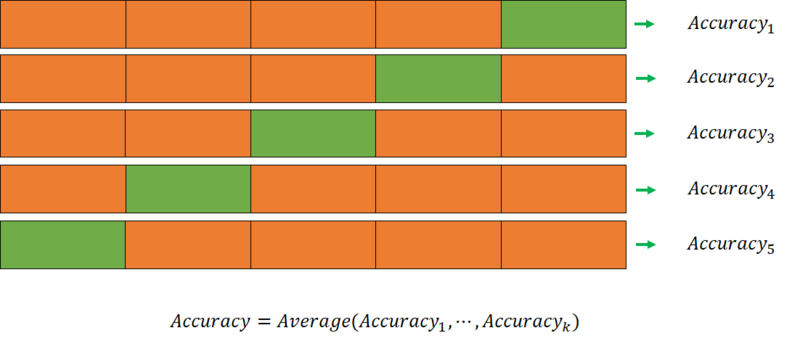

출처(https://m.blog.naver.com/ckdgus1433/221599517834)

위의 그림은 5 폴드 교차 검증이며 주황색이 학습 데이터, 초록색이 검증 데이터  
5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가한다. 사이킷런에서는 K 폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold 클래스를 제공한다.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [48]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in kfold.split(features):

    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1 
    
    # 반복 시마다 정확도 측정
    accuaracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuaracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}' .format(n_iter, test_index))
    cv_accuracy.append(accuaracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


### Stratified K 폴드

불균형한(imbalanced) 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식  
불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 먹어서 값의 분포가 한쪽으로 치우치는 것  
K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해준다.  
원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.

In [85]:
import pandas as pd 

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [86]:
# 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증시마다 생성되는 학습/검증 레이블 데이터 값의 분포도 확인

kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1 
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었다.  
StratifiedKFold 는 이렇게 KFold 로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 준다.  

In [87]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1 
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [88]:
# StratifiedKFold 를 이용해 붓꽃 데이터 교차 검증

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold 의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1 
    accuaracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuaracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuaracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증을 해야한다. 사실, 일반적으로 분류에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할돼야 한다. 회귀에서는 Stratified K 폴드가 지원되지 않는다. 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문이다.

### 교차 검증을 보다 간편하게 - cross_val_score()

KFold 로 데이터를 학습하고 예측하는 코드를 보면 먼저 ① 폴드 세트를 설정하고 ② for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 ③ 반복적으로 학습과 예측을 수행하고 예측 성능을 반환한다. cross_val_score()는 이런 일련의 과정을 한꺼번에 수행해주는 API 이다.  

**cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2 * n_jobs')**



* 주요 파라미터 estimator, X, y, Scoring, cv

estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor 을 의미  
X : 피처 데이터 세트  
y : 레이블 데이터 세트  
scoring : 예측 성능 평가 지표  
cv : 교차 검증 폴드 수  

cross_val_score() 수행 후 반환 값은 scoring 파라미터롤 지정된 성능 지표 측정값을 배열 형태로 반환한다.  
classifier 가 입력되면 Startified K 폴드 방식으로 레이블값을 분포에 따라 학습/테스트 세트를 분할한다. 회귀인 경우는 K 폴드 방식으로 분할한다.

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


비슷한 API 로 cross_validate()가 있다. cross_val_score()는 단 하나의 평가 지표만 가능하지만 cross_validate()는 여러 개의 평가 지표를 반환할 수 있다. 또한 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공한다. 그러나 보통 cross_val_score() 하나로도 대부분의 경우 쉽게 사용 가능하다.

## GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다. 사이킷런은 GridSearchCV API 를 이용해 Classifier 나 Regressor 와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.

In [91]:
grid_parameters = {'max_depth': [1,2,3],
                   'min_samples_split': [2,3]}

하이퍼 파라미터는 다음과 같이 순차적으로 적용된다.

    순번  max_depth  min_samples_split
     1       1              2
     2       1              3
     3       2              2
     4       2              3
     5       3              2
     6       3              3

GridSearchCV 는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 즉, 데이터 세트를 cross-validation 을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다. GridSearchCV 는 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸린다.

* GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터

estimator : classifier, regressor, pipline 이 사용될 수 있다.  
param_grid : key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator 의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.  
scoring : 예측 성능을 측정할 평가 방법을 지정한다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예: 정확도의 경우 'accuracy')로 지정하나 별도 성능 평가 지표 함수도 지정할 수 있다.  
cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정한다.  
refit : default 가 True 이며 True 로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

In [92]:
# DecisionTreeClassifier 의 중요 하이퍼 파라미터인 max_depth 와 min_samples_split 의 값을 변화하면서 최적화를 진행

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [93]:
import pandas as pd 

# param_grid 의 하이퍼 파라미터를 3개의 train, test set fold 로 나누어 테스트 수행 설정.
### refit=True 가 default 임. True 이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터롤 param_grid 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame 으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


params : 수행할 때마다 적용된 개별 하이퍼 파라미터 값을 나타낸다.  
rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타낸다. 1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터이다.  
mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다.  

In [94]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4F}', format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:{0:.4F} 0.975


GridSearchCV 객체의 생성 파라미터로 refit=True 가 default 이며 refit=True 이면 GridSearchCV 가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator 를 학습해 best_estimator_로 저장한다. 

In [95]:
# GridSearchCV 의 refit 으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV 의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667
